https://colab.research.google.com/drive/14QwQE6IUMCRmSdG-BzX0owPoIrckTdjg?usp=sharing

# **Project Name** -Amazon Prime Video Dataset EDA

**Project Summary -**
This exploratory data analysis (EDA) project aims to uncover insights from Amazon Prime VIDEO'S library.This project looks at the movies and shows available on Amazon Prime plateform to find useful information. It uses two files:(titles.csv)- one has details about the shows (columns like names, types, and ratings), and the other ( credit.csv)- with columns the people involved, like actors and directors. The goal is to understand what kind of content is on Prime Video, where it's popular, how it has changed over time, and what viewers like the most. This information can help people who make or manage shows—like content creators, streaming platforms, or business teams—see what's working, what people enjoy watching, and where they should focus in the future.

https://drive.google.com/file/d/1x-QLBM52eoOZc0M979ENCzfveMeDv_2f/view?usp=sharing

https://drive.google.com/file/d/16asJlnmW4bCdbGRhioehBKBRYcDeOGQe/view?usp=sharing

# GitHub Link -
https://github.com/kiranrawat-learning/Amazon-Prime-Video-Dataset-EDA/blob/main/Capstone_project_2_Exploratory_Data_Analysis.ipynb

# Objective:

The main goal of this project is to study the shows/movies available on Amazon Prime Video and find useful patterns and insights. By doing this, we need to understand what types of shows are popular, how the content is spread across different regions, how the platforms content has changed over time, and which shows have the best ratings. These findings can help streaming platforms and content creators make smarter decisions about what kind of shows to add, which regions to focus on, and how to keep viewers engaged.on which contet they need to focus more . what genres needs marketing , what certification content is most valuable for amazon .

# Problem Statement
 This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

- Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?

- Trends Over Time: How has Amazon Prime’s content library evolved?

- IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
- By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# 1. Know Your Data

### Import Libraries

In [383]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Dataset Loading

In [384]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [385]:
# Load Dataset
credits=pd.read_csv('/content/drive/MyDrive/dataset/credits.csv')
titles=pd.read_csv('/content/drive/MyDrive/dataset/titles.csv')


###  Dataset First View

In [386]:
# Dataset Info credits
credits.head(5)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [387]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [388]:
# Dataset Info titles
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [389]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [390]:
# Dataset Duplicate Value Count
credits.duplicated().sum()

np.int64(56)

In [391]:
titles.duplicated().sum()

np.int64(3)

In [392]:
titles[titles.duplicated()] #there is no such rows duplicated Same values in all columns These rows might technically called duplicates.

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


#### Missing Values/Null Values

In [393]:
titles.shape

(9871, 15)

In [394]:
titles.isnull().sum()


,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [395]:
credits.shape

(124235, 5)

In [396]:
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


### What did you know about your dataset?


After exploring the dataset, I got to know many interesting things:

- The dataset contains movies and tv shows available on  Prime Video.

- Each row gives details like title, type movie or show, release year, genre, imdb ratings, and more.

- Most of the content is movies, and the most common genres are drama, comedy, and action.

- I noticed that a lot of shows come from the US, but there are also titles from other countries.

- Some columns had missing values, like age_certification, seasons, and tmdb_score.




# 2. **Understanding Your Variables**

In [397]:
credits.info() #coloumn name checking variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [398]:
titles.info() #titles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [399]:
# Dataset Describe
credits.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


In [400]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000



### Variables Description
**1. titles**
- id: The title ID on JustWatch.
- title: The name of the title.
- show_type: TV show or movie.
- description: A brief description.
- release_year: The release year.
- age_certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production_countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW.
- imdb_id: The title ID on IMDB.
- imdb_score: Score on IMDB.
- imdb_votes: Votes on IMDB.
- tmdb_popularity: Popularity on TMDB.
- tmdb_score: Score on TMDB.

2. **credits**
- person_ID: The person ID on JustWatch.
- id: The title ID on JustWatch.
- name: The actor or director's name.
- character_name: The character name.
- role: ACTOR or DIRECTOR.

### Check Unique Values for each variable.

In [401]:
#unique values for each column
for column in credits.columns:
    unique_values = credits[column].unique()
    print(unique_values)
    print()  # Just to add an extra line


[  59401   31460   31461 ... 1938565  728899 1938620]

['ts20945' 'tm19248' 'tm82253' ... 'tm1079144' 'tm847725' 'tm1054116']

['Joe Besser' 'Moe Howard' 'Larry Fine' ... 'Vijay Thakur' 'Vanya Wellens'
 'Vishwa Bhanu']

['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']

['ACTOR' 'DIRECTOR']



In [402]:
for column in titles.columns:
    unique_values = titles[column].unique()
    print(unique_values)
    print()  # Just to add an extra line

['ts20945' 'tm19248' 'tm82253' ... 'tm847725' 'tm1054116' 'ts275838']

['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Chasing' 'Baikunth' 'Waking Up Eighty']

['SHOW' 'MOVIE']

["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an attached boxcar—and he single-handedly must do all in his power to both get The General back and to rescue Annabelle."
 "It's

# 2. **Data Wrangling Code**


##data accessing
**Column Types**

**Numerical**
1. credits-  person id,
2. titles- release_year,runtime ,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score

**Categorical**
1. credits--role,id (links to titles.csv),character
2. titles- id,title,type,description,age_certification,genres,production_countries,imdb_id

**tidiness issue**
1. **titles.csv**
 -  genres and production_countries:list
 - seasons: only applies to tv shows, so it's mostly null for movies
2. **credits.csv**
- role- in role there are two category -- actor and director

**Quality Issues**
1. **titles.csv**
-  description: Contains missing values
-  age_certification: High number of missing values
-  imdb_id: Some rows are missing
-  imdb_score, imdb_votes, tmdb_popularity, tmdb_score:  contain missing values
2. **credits.csv**
-  character: Missing in many rows
-  Same person_id

### Data cleaning

In [403]:
titles.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8


In [404]:
#make copy for data set
titles_df=titles.copy()
credits_df=credits.copy()

In [405]:
# it's making the genres column look cleaner-- as we have different genre in one row for the movie so i want to create count
titles_df['genres'] = titles_df['genres'].fillna('[]').str.strip("[]").str.replace("'", "")
titles_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"action, drama, war, western, comedy, european",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [406]:
#genres list
genres_count= titles_df['genres'].str.split(",").apply(len)
genres_count

,genres
0,6
1,6
2,3
3,3
4,3
...,...
9866,1
9867,1
9868,1
9869,2


In [407]:
titles_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"action, drama, war, western, comedy, european",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [408]:
#new genre count coloumn
titles_df.insert(8,'genres_count',genres_count)

In [409]:
titles_df['genres_count'].value_counts()

,count
genres_count,
1,3267
2,2916
3,2207
4,1006
5,357
6,88
7,23
8,7


In [410]:
#reducing list-- as in country was in brackets so removing it
titles_df['production_countries']=titles_df['production_countries'].str.strip('[]').str.replace("'",'')

In [411]:
#seasons: only applies to tv shows, so it's mostly null for movies
titles_df['seasons'].fillna('N/A', inplace=True)


<ipython-input-411-8674961beb59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['seasons'].fillna('N/A', inplace=True)
<ipython-input-411-8674961beb59>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titles_df['seasons'].fillna('N/A', inplace=True)


In [412]:
titles_df['seasons'].isnull().sum()

np.int64(0)

In [413]:
#role has two values but we really dont need to make it a seprate coloumn for it
credits_df['role'].value_counts()

,count
role,
ACTOR,115846
DIRECTOR,8389


In [414]:
credits_df[credits_df['id']=='tm19248'] #checking for a movie duplicates if needs to removed

,person_id,id,name,character,role
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR
9,28718,tm19248,Joe Keaton,Union General,ACTOR
10,28721,tm19248,Al St. John,Officer on Horseback (uncredited),ACTOR
11,28717,tm19248,Frank Barnes,Annabelle's Brother,ACTOR
12,28719,tm19248,Mike Donlin,Union General,ACTOR


In [415]:
#'character' missing values
credits_df['character'].isnull().sum()

np.int64(16287)

In [416]:
credits_df['character'].fillna('Unknown', inplace=True) #replacing value

<ipython-input-416-29cf7fcfaa85>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credits_df['character'].fillna('Unknown', inplace=True) #replacing value


In [417]:
#description: Contains missing values
titles_df['description'].isnull() #as we are not doing text ananlysis here so that why i m dropping the decription coloumn

,description
0,False
1,False
2,False
3,False
4,False
...,...
9866,False
9867,False
9868,False
9869,False


In [418]:
titles_df.drop(columns=['description'], inplace=True)

In [419]:
#age certification
titles_df['age_certification'].value_counts()

,count
age_certification,
R,1249
PG-13,588
PG,582
G,269
TV-MA,217
TV-14,188
TV-PG,91
TV-Y,78
TV-G,57


In [420]:
#checking rows if i can drop what if i have num of missing value -coloumns in a same row
columns_to_check = ['imdb_score', 'tmdb_popularity', 'imdb_votes', 'tmdb_score','production_countries']
threshold = 3
titles_df[titles_df[columns_to_check].isnull().sum(axis=1) > threshold]
titles_df.drop(9838,inplace=True)
titles_df.drop(9865,inplace=True)

In [421]:
columns_to_check = ['imdb_score', 'tmdb_popularity', 'imdb_votes', 'tmdb_score','production_countries']
threshold = 3 #threshold so if a row has more than 3 null values so we can replace it
titles_df[titles_df[columns_to_check].isnull().sum(axis=1) > threshold]

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
672,tm582037,Ye Shang Hai,MOVIE,1941,NaN,62,drama,1,,N/A,tt3594666,NaN,NaN,NaN,NaN
731,tm686160,Peculiar Pets,MOVIE,1921,NaN,47,documentation,1,,N/A,tt0981329,NaN,NaN,NaN,NaN
795,tm769632,Sri Valli,MOVIE,1945,NaN,114,drama,1,,N/A,tt0240922,NaN,NaN,NaN,NaN
1661,tm544335,Dhonni Meye,MOVIE,1975,NaN,133,drama,1,,N/A,tt5526358,NaN,NaN,NaN,NaN
1664,tm539392,John Brown's Body,MOVIE,1962,NaN,90,drama,1,,N/A,tt5868054,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,ts290388,Daddydelphia,SHOW,2021,NaN,30,"animation, comedy",2,,1.0,tt14244932,NaN,NaN,NaN,NaN
9827,tm1099582,Hero 115,MOVIE,2021,NaN,62,drama,1,,N/A,tt15287084,NaN,NaN,NaN,NaN
9841,tm1153832,Last Summer in Oxford,MOVIE,2021,NaN,63,"comedy, drama",2,,N/A,tt16219994,NaN,NaN,NaN,NaN
9848,tm1008661,Trying Grace,MOVIE,2021,NaN,88,drama,1,,N/A,tt13563658,NaN,NaN,NaN,NaN


In [422]:
titles_df['age_certification'].isnull().sum()

np.int64(6485)

In [423]:
missing_ratio = titles_df['age_certification'].isnull().mean() * 100
missing_ratio #checking missing ratio what if it is less than 10 percent but we cant drop missing values here

np.float64(65.71081163238424)

In [424]:
titles_df['age_certification'].fillna('Missing', inplace=True)

<ipython-input-424-83a4b18cbac1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['age_certification'].fillna('Missing', inplace=True)


In [425]:
#imdb_id: Some rows are missing
titles_df['imdb_id'].isnull().sum()

np.int64(667)

In [426]:
titles_df.groupby('type')['imdb_id'].apply(lambda x: x.isnull().sum()) #using lambda function to check two categories has how many null values

,imdb_id
type,
MOVIE,559
SHOW,108


In [427]:
titles_df['imdb_id'].fillna('Unknown', inplace=True)

<ipython-input-427-27ca0fc5a7b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_id'].fillna('Unknown', inplace=True)


In [428]:
#imdb_score, imdb_votes, tmdb_popularity, tmdb_score: contain missing values
titles_df['imdb_score'].isnull().sum()

np.int64(1019)

In [429]:
titles_df['imdb_score'].describe()
#as we can see in the data some value is beyond --outliers are there so using quantile method to reduce it
Q1 = titles_df['imdb_score'].quantile(0.25)
Q3 = titles_df['imdb_score'].quantile(0.75)
IQR = Q3 - Q1


In [430]:
#filtering data where imdb score is in between quartile range -->> to handles outliers
filtered_data=titles_df[(titles_df['imdb_score'] >= (Q1 - 1.5 * IQR)) & (titles_df['imdb_score'] <= (Q3 + 1.5 * IQR))]
mean=filtered_data['imdb_score'].mean()
titles_df['imdb_score'].fillna(round(mean,2), inplace=True) #rounding up

<ipython-input-430-18bc348a21d7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_score'].fillna(round(mean,2), inplace=True) #rounding up


In [431]:
titles_df['imdb_votes'].isnull().sum()

np.int64(1029)

In [432]:
titles_df['imdb_votes'].value_counts()

,count
imdb_votes,
11.0,43
28.0,43
25.0,34
12.0,34
24.0,33
...,...
4030.0,1
4188.0,1
6231.0,1


In [433]:
titles_df['imdb_votes'].fillna(0, inplace=True) #replacing with 0

<ipython-input-433-adc13ae564b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_votes'].fillna(0, inplace=True) #replacing with 0


In [434]:
Q1 = titles_df['tmdb_popularity'].quantile(0.25)
Q3 = titles_df['tmdb_popularity'].quantile(0.75)
IQR = Q3 - Q1
IQR
filtered_data=titles_df[(titles_df['tmdb_popularity'] >= (Q1 - 1.5 * IQR)) & (titles_df['tmdb_popularity'] <= (Q3 + 1.5 * IQR))]
mean=filtered_data['tmdb_popularity'].mean()
titles_df['tmdb_popularity'].fillna(round(mean,2), inplace=True)

<ipython-input-434-98ceb85fe9ef>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['tmdb_popularity'].fillna(round(mean,2), inplace=True)


In [435]:
 #tmdb_popularity, tmdb_score: contain missing values
 titles_df['tmdb_score'].isnull().sum()

np.int64(2080)

In [436]:
#as we can see in the data some value is beyond --outliers are there so using quantile method to reduce it
Q1 = titles_df['tmdb_score'].quantile(0.25)
Q3 = titles_df['tmdb_score'].quantile(0.75)
IQR = Q3 - Q1
IQR
filtered_data=titles_df[(titles_df['tmdb_score'] >= (Q1 - 1.5 * IQR)) & (titles_df['tmdb_score'] <= (Q3 + 1.5 * IQR))]
mean=filtered_data['tmdb_score'].mean()
titles_df['tmdb_score'].fillna(round(mean,2), inplace=True) #rounding up

<ipython-input-436-5ae270a335b2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['tmdb_score'].fillna(round(mean,2), inplace=True) #rounding up


In [437]:
titles_df['tmdb_score'].isnull().sum()

np.int64(0)

In [438]:
#charcters have missing values --already filled with unknown
credits_df.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0


In [439]:
titles_df.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [440]:
#checking duplicates of person id in credit
credits_df['person_id'].duplicated().sum()

np.int64(43727)

In [441]:
credits_df.shape

(124235, 5)

In [442]:
credits_df[credits_df['person_id']==21174]

,person_id,id,name,character,role
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
26,21174,tm19248,Buster Keaton,Unknown,DIRECTOR
642,21174,tm3541,Buster Keaton,William 'Willie' Canfield Jr.,ACTOR
649,21174,tm3541,Buster Keaton,Unknown,DIRECTOR
2230,21174,tm16924,Buster Keaton,"Ronald, The Boy",ACTOR
2238,21174,tm16924,Buster Keaton,Unknown,DIRECTOR
4412,21174,tm73200,Buster Keaton,Lonesome Polecat,ACTOR
4423,21174,tm73200,Buster Keaton,Unknown,ACTOR
4776,21174,tm57795,Buster Keaton,Policeman,ACTOR
5188,21174,tm56395,Buster Keaton,Reginald Irving,ACTOR


### What all manipulations have you done and insights you found?
- most content on amazon prime is movies.
- the most common genres are drama and comedy
- usa is the top content-producing country.
- many titles do not have an age certification.
- tv shows has many seasons.
- in the dataset, genres coloumn written with extra brackets and symbols. I cleaned that up and also added a new column-genre count
- country names were inside brackets like a list, so I removed those. Also, for shows where the number of seasons was missing, I filled it with ‘N/A’
-  checked the credits data although it has duplicated rows but dont realluy need to remove vecause they different person id although we can merge data as per th movies id .
- Some rows had missing character names. Since it’s not a big issue, I just filled them with “Unknown”.
- for imdb score, i filled the empty values with the average score.
- for imdb votes, i replaced missing ones with 0.
- for imdb id, i used the word “unknown” wherever it was missing.
- ge certification was missing in some places. i filled those empty spots with the word “missing” to keep it clean.


### merging data
join (merge) titles_df and credits_df — it will add more useful information to data and help you find better insights.

In [496]:
movie_df=titles_df.merge(credits_df, on='id', how='left')

In [444]:
movie_df.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'genres_count', 'production_countries', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'person_id', 'name', 'character', 'role'],
      dtype='object')

In [445]:
movie_df.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [446]:
movie_df[movie_df[['person_id', 'name', 'character', 'role']].isnull().all(axis=1)]

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
2063,tm348419,Payoff in the Pacific,MOVIE,1945,Missing,56,,1,,N/A,Unknown,6.0,0.0,0.60,6.02,NaN,NaN,NaN,NaN
7531,tm18966,D-Day: The Normandy Invasion,MOVIE,1945,Missing,21,,1,,N/A,Unknown,6.0,0.0,0.60,8.00,NaN,NaN,NaN,NaN
12309,tm582037,Ye Shang Hai,MOVIE,1941,Missing,62,drama,1,,N/A,tt3594666,6.0,0.0,3.14,6.02,NaN,NaN,NaN,NaN
13278,tm686160,Peculiar Pets,MOVIE,1921,Missing,47,documentation,1,,N/A,tt0981329,6.0,0.0,3.14,6.02,NaN,NaN,NaN,NaN
14212,tm769632,Sri Valli,MOVIE,1945,Missing,114,drama,1,,N/A,tt0240922,6.0,0.0,3.14,6.02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125286,tm1076901,Jaan! Jaan Loge Kya?,MOVIE,2021,Missing,114,drama,1,,N/A,tt14954126,3.8,12.0,0.60,6.02,NaN,NaN,NaN,NaN
125287,tm1084430,Parigettu Parigettu,MOVIE,2021,Missing,130,"thriller, crime",2,,N/A,tt15094256,7.3,1292.0,3.14,6.02,NaN,NaN,NaN,NaN
125315,tm1090675,Burning Man: The Musical,MOVIE,2021,Missing,74,,1,,N/A,tt15194208,7.4,231.0,0.60,6.02,NaN,NaN,NaN,NaN
125316,tm1142918,Ty Barnett: Yep,MOVIE,2021,PG,25,,1,,N/A,tt11979448,6.0,0.0,0.60,5.80,NaN,NaN,NaN,NaN


In [447]:
movie_df.shape

(125352, 19)

In [448]:
movie_df = movie_df[~movie_df[['person_id', 'name', 'character', 'role']].isnull().all(axis=1)]

In [449]:
movie_df.isna().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [450]:
movie_df['production_countries'] = movie_df['production_countries'].str.strip().replace('', np.nan)

# Now fill NaN ( 'Unknown', as needed)
movie_df['production_countries'] = movie_df['production_countries'].fillna('Unknown')

In [497]:
movie_df.to_csv('movie_df.csv', index=False)
from google.colab import files
files.download('movie_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Data Visualisation

###Univariate analysis

####Content Diversity:
 What genres and categories dominate the platform?

In [452]:
movie_df.head(3)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR


In [453]:
#as we have duplicated rows in this data so i can group data as per the id  of movies so i will be having every iinformation regarding it '''
#so we will  have unique ids only for every movie data
group_as_per_id=movie_df.groupby('id').first().reset_index()

In [454]:
 #explode using for every genre will count in every movie so  that we can have the exact count
 genre_count=group_as_per_id['genres'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
 genre_count

,count
genres,
drama,4437
comedy,2789
thriller,2052
action,1746
romance,1688
crime,1202
horror,1029
documentation,894
european,691


<ipython-input-498-739752e3cb73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


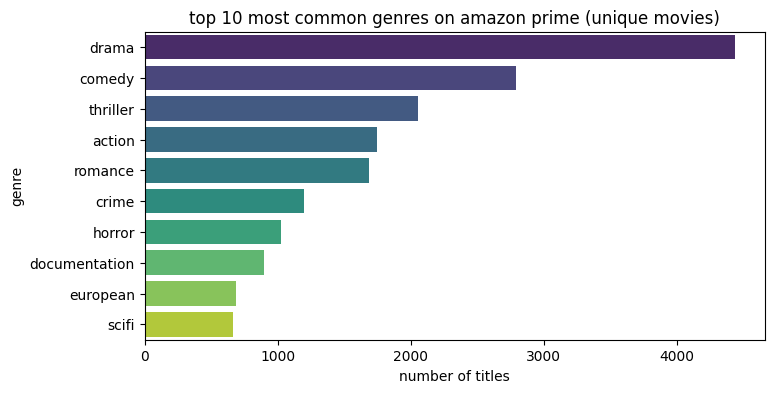

In [498]:
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('top 10 most common genres on amazon prime (unique movies)')
plt.xlabel('number of titles')
plt.ylabel('genre')

plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a bar chart because it clearly shows the count of each genre. it's easy to compare which genres appear more or less. bar charts are best when we want to show and compare categories like genres.

2.**What is/are the insight(s) found from the chart**?

**ans** the chart shows that drama, comedy, and thriller  are the most common genres on amazon prime. it also tells us that some genres like action and thriller are quite popular too on amazon prime .

3.**Will the gained insights help creating a positive business impact?**

**ans** yes. these insights can help amazon prime focus more on popular genres like drama and comedy. it helps in better content planning and user engagement.

4.**Are there any insights that lead to negative growth? Justify with specific reason.**
**ans**  yes, a possible negative insight is that some genres may be underrepresented, like documentary or sci-fi.amazon prime will miss the  users who like these genres we can also compare with netflix in same genre to have better understanding

#### 2. Regional Availability:
 How does content distribution vary across different regions?

In [456]:
# first removing rows where production countries are unknown
group_as_per_id_country=group_as_per_id[group_as_per_id != 'Unknown']

In [457]:
#country coloumn also have more than one value in some rows so exploding for a batter count--top 10 country as per num of movies making
top_country=group_as_per_id_country['production_countries'].dropna().str.split(",").explode().str.strip().value_counts().head(10)


In [458]:
top_country

,count
production_countries,
US,5070
IN,985
GB,854
CA,498
FR,235
JP,187
DE,165
AU,164
IT,143


<ipython-input-459-47fc51261dc0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.index, y=top_country.values, palette='mako')


Text(0, 0.5, 'number of titles')

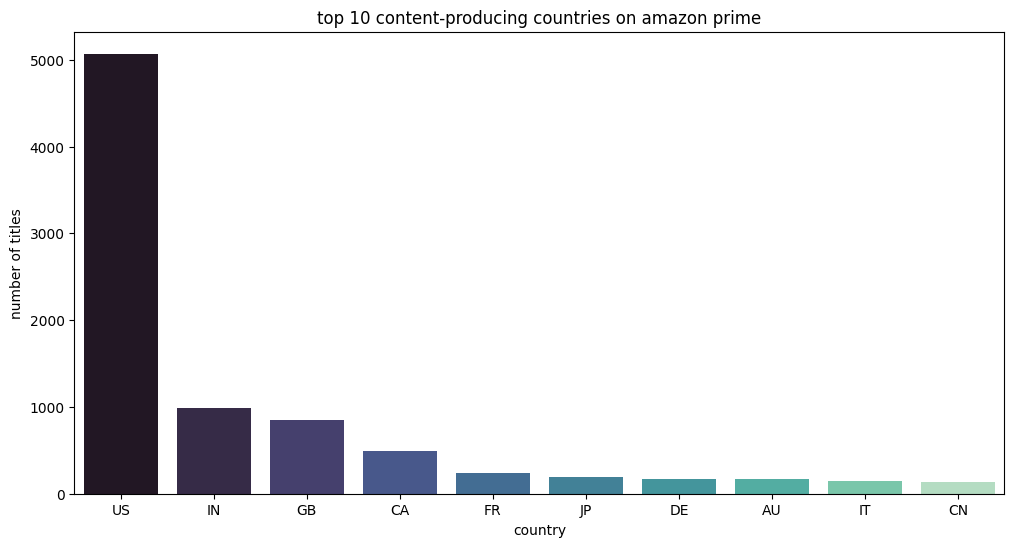

In [459]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_country.index, y=top_country.values, palette='mako')
plt.title('top 10 content-producing countries on amazon prime')
plt.xlabel('country')
plt.ylabel('number of titles')

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a bar chart because it makes it easy to compare how many movies each country has produced. it clearly shows which countries contribute more content to amazon prime we are working with count so .

2.**What is/are the insight(s) found from the chart**?

**ans** the chart shows that the USA is the top content-producing country by far. other countries like India, ,UK(GB) and Canada also contribute a good number of titles.

3.**Will the gained insights help creating a positive business impact?**

**ans** yes. this insight can help amazon prime understand which regions are most active in content creation. they can focus more on partnerships, marketing, and content investments in countries like usa and india to attract and retain more viewers.

4.**Are there any insights that lead to negative growth? Justify with specific reason.**
**ans** yes, one possible negative point is that many countries are underated. this means that amazon prime might not be giving diverse content this could slow down growth in global markets.

#### Trends Over Time:
 How has Amazon Prime’s content library evolved?

In [460]:
#grouping data as per release year
trend_data=group_as_per_id.groupby('release_year')['title'].count().reset_index()

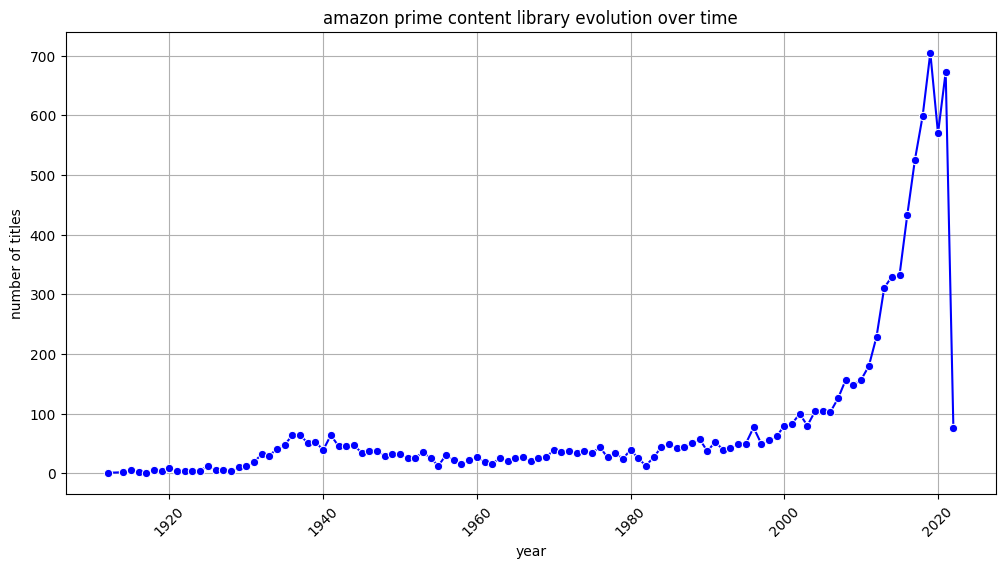

In [461]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='title', data=trend_data, marker='o', color='blue')
plt.title('amazon prime content library evolution over time')
plt.xlabel('year')
plt.ylabel('number of titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** A line plot is great for showing trends over time. In this case, it's used to track how the number of titles (movies/series) on Amazon Prime has evolved over the years.

2.**What is/are the insight(s) found from the chart**?

**ans** the chart shows that the in between 2013 to 2019 is the top contribute a good number of titles -- but after 2019 we can see reducing num of titles it could be due to lockdown -- corona period

3.**Will the gained insights help creating a positive business impact?**

**ans** yes. this insight can help amazon prime understand which years were most active in content creation.how the num of content evolving --over the years .

4.**Are there any insights that lead to negative growth? Justify with specific reason.**
**ans** yes, one possible negative point is that many years specically is giving count so it will not tell the qualities of content creation.

###bivariate analysis and Multivariate analysis

#### What is the distribution of the number of genres per movie/show with ratings ?

In [462]:
group_as_per_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8861 non-null   object 
 1   title                 8861 non-null   object 
 2   type                  8861 non-null   object 
 3   release_year          8861 non-null   int64  
 4   age_certification     8861 non-null   object 
 5   runtime               8861 non-null   int64  
 6   genres                8861 non-null   object 
 7   genres_count          8861 non-null   int64  
 8   production_countries  8861 non-null   object 
 9   seasons               8861 non-null   object 
 10  imdb_id               8861 non-null   object 
 11  imdb_score            8861 non-null   float64
 12  imdb_votes            8861 non-null   float64
 13  tmdb_popularity       8861 non-null   float64
 14  tmdb_score            8861 non-null   float64
 15  person_id            

In [463]:
# sort movies by genres_count in descending order
top_genre_movies = group_as_per_id.sort_values(by='genres_count', ascending=False)
top_genre_movies=top_genre_movies[['title', 'genres_count','imdb_score','type']]
top_genre_movies.head(2)


,title,genres_count,imdb_score,type
8415,Sonic X,8,6.1,SHOW
8583,Sonic Underground,8,6.1,SHOW


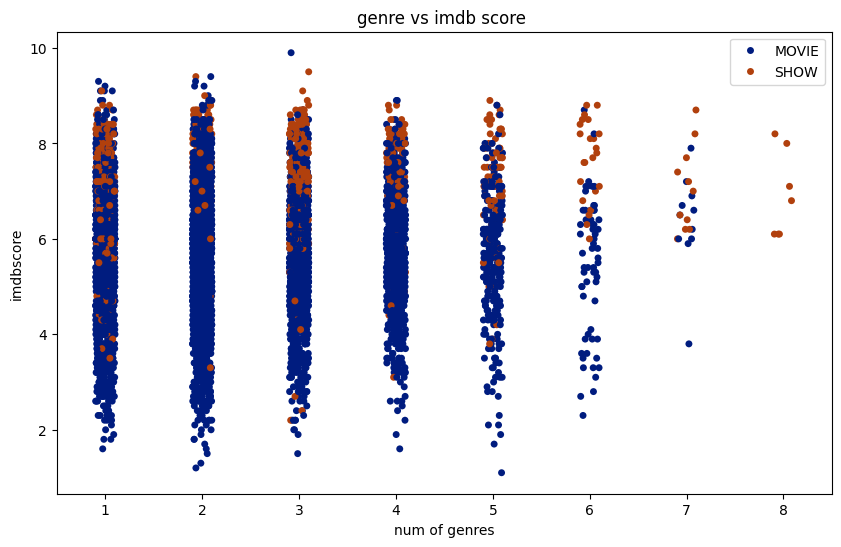

In [464]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='genres_count', y='imdb_score', data=top_genre_movies, hue='type', palette='dark', jitter=True)
plt.title('genre vs imdb score ')
plt.xlabel('num of genres')
plt.ylabel('imdbscore')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** I chose a stripplot because it allows us to clearly see the distribution imdb scores across movies with different genre counts. .also it will give you different parametres like hue so we can add more variability.

2.**What is/are the insight(s) found from the chart**?
**ans.**  Even though some movies or shows belong to a high number of genres, it doesn't mean it will gurantee you to have higher rating ,  The combination of multiple genres may create confusion,also if genre count is high we need to focus on to take shows only as there rating are much more than movies.



3.**Will the gained insights help creating a positive business impact?**

**ans** Yes, this chart can help content creators or platforms like Amazon Prime understand that if we have genre count in btween 2/3 it will not create much confusion also ,

4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** Yes, if the stripplot shows that movies with more genres do not necessarily have better imdb scores, it might indicate that forcing multiple genres into a movie could result in lower quality, making it harder to satisfy a target audience.

#### Age Certification:trend over time

In [465]:
#as we want over the period of time we want to see how age--certification is evolving what with num of count

#first we need age certification data where it is not missing - filtering
group_as_per_id_age=group_as_per_id[group_as_per_id['age_certification']!='Missing']

#grouing with release year and age certification and then counting num of titles
age_cert_title_counts = group_as_per_id_age.groupby(['release_year', 'age_certification'])['title'].count().reset_index()


In [499]:
# as we need to  make it pivot here so we can have a pivot where inindex release year , values will be movie ccount and coloumn would be age cert
age_cert_wide=age_cert_title_counts.pivot(index='release_year', columns='age_certification', values='title').fillna(0)
age_cert_wide

age_certification,G,NC-17,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7
release_year,,,,,,,,,,,
1919,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1929,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018,15.0,2.0,31.0,25.0,44.0,13.0,1.0,17.0,3.0,1.0,1.0
2019,19.0,0.0,33.0,41.0,67.0,12.0,1.0,25.0,1.0,2.0,2.0
2020,11.0,1.0,29.0,33.0,61.0,9.0,0.0,24.0,2.0,0.0,2.0


In [467]:
#as we have many years so what i can do it -- i can create it like every 10 year how it evolving only taking that datsa
every_10_year = age_cert_wide[age_cert_wide.index % 10 == 0]

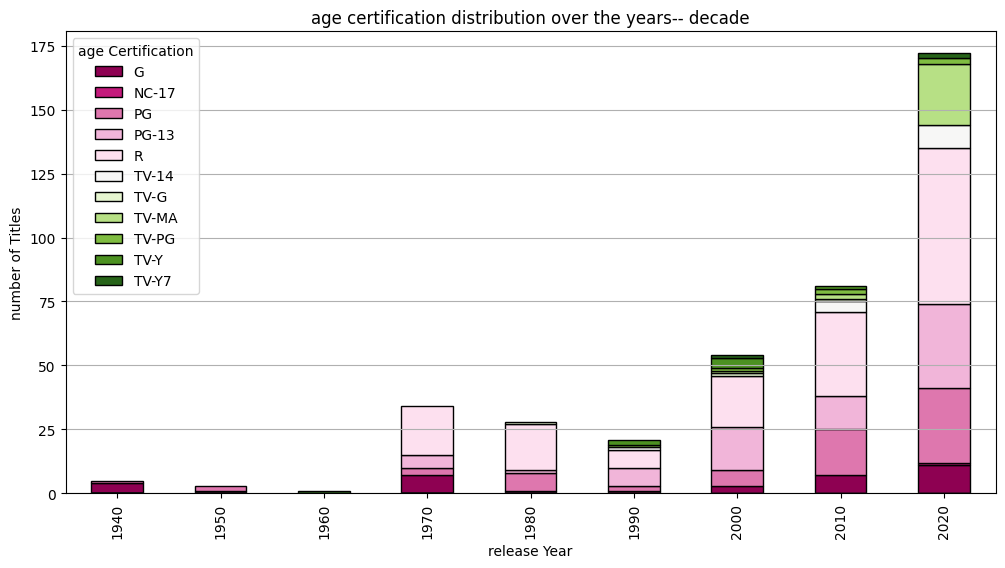

In [468]:
every_10_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='PiYG', edgecolor='black')
plt.title('age certification distribution over the years-- decade')
plt.xlabel('release Year')
plt.ylabel('number of Titles')
plt.legend(title='age Certification',loc='upper left')
plt.grid(axis='y')
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** I used a stacked bar chart because it clearly shows how content is distributed across  age certifications over time.we are analysing 3 parametre like with time -- the count of age certification distribution  .

2.**What is/are the insight(s) found from the chart**?

**ans**The chart is showing that over the years, there has been an increase in content suitable for mature like 16+,during 20s-- num of different age certification titles were made as compared to 90s. However, there is a decline in overall in this 2019, possibly due to production slowdowns
during the COVID.

3.**Will the gained insights help creating a positive business impact?**

**ans** Yes. by looking at which age groups most of the content is made for, Amazon Prime can plan better for the future. On the other hand, if there's not much content for kids or families, they can start creating more in that area to attract those viewers too.

4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** yes, one possible negative point is age-certification data alone doesn’t tell the quality of content .

#### IMDb Ratings & Popularity:
What are the highest-rated or most popular shows on the platform?

In [469]:
group_as_per_id.head(3)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,"western, action, romance",3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,2021,Missing,99,"scifi, animation",2,CN,N/A,tt11654032,5.4,117.0,6.135,3.8,1793831.0,Chris Boike,Unknown,ACTOR
2,tm1000169,Bad Cupid,MOVIE,2021,Missing,81,"romance, comedy",2,Unknown,N/A,tt11333938,4.4,181.0,3.295,4.8,2853.0,John Rhys-Davies,Archie,ACTOR


In [470]:
#shows---top 10  imdb_rated shows:
#first type as we only want shows
shows_in_data = group_as_per_id[group_as_per_id['type'] == 'SHOW']
#now sorting the values as per the imdb score and votes
top_imdb_shows = shows_in_data.sort_values(by=['imdb_score', 'imdb_votes'], ascending=[False, False])

top_imdb_shows=top_imdb_shows[['title', 'release_year', 'imdb_score', 'imdb_votes']].head(10)


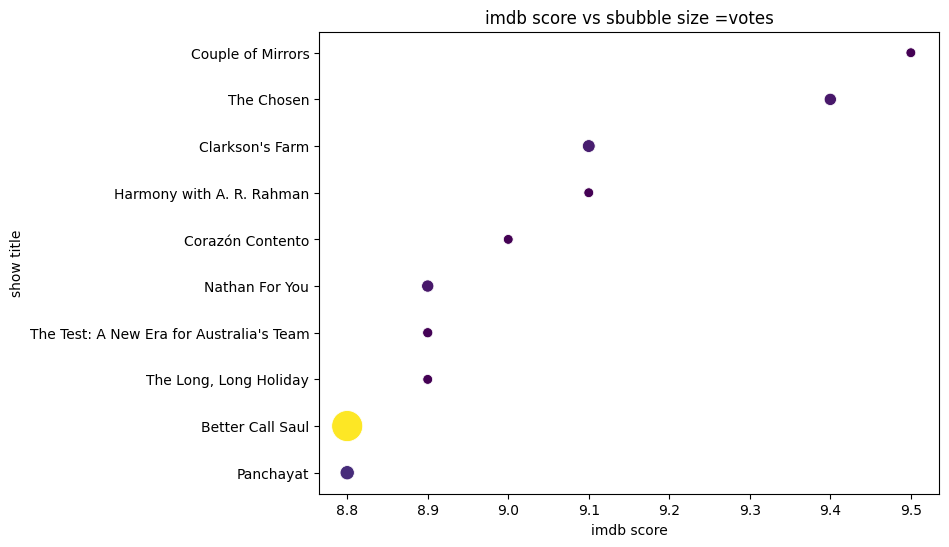

In [500]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_imdb_shows,x='imdb_score',y='title',size='imdb_votes', hue='imdb_votes',palette='viridis',legend=False, sizes=(50, 500))
plt.title('imdb score vs sbubble size =votes')
plt.xlabel('imdb score')
plt.ylabel('show title')
plt.show()



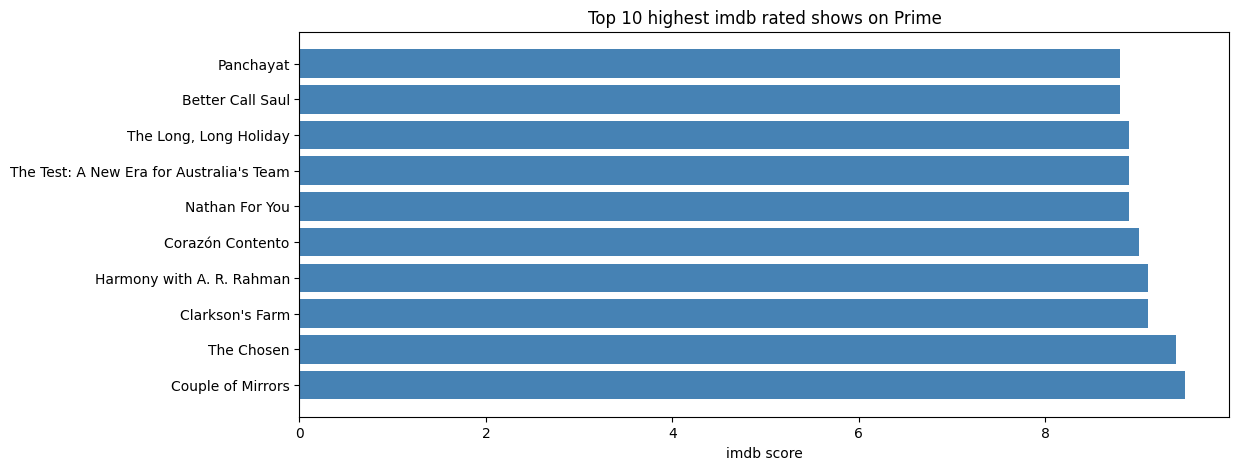

In [472]:
plt.figure(figsize=(12, 5))
plt.barh(top_imdb_shows['title'], top_imdb_shows['imdb_score'], color='steelblue')
plt.title('Top 10 highest imdb rated shows on Prime')
plt.xlabel('imdb score')
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a bubble chart because it shows two things together – how good a show is (imdb score) and how many people rated it (bubble size). bigger bubbles mean more people watched and rated that show. it's easy to compare both rating and popularity in one chart.

2.**What is/are the insight(s) found from the chart**?

**ans**
some shows have very high imdb scores and also big bubbles – that means they are both top-rated and popular. some other shows also have good scores but small bubbles, so they might be good but not many people know about them yet.


3.**Will the gained insights help creating a positive business impact?**

**ans** yes, this helps prime see which shows are doing well and which ones need more promotion. they can focus on popular shows and also try to bring more attention to hidden gems that people might like.



4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** yes, if a show is rated highly but has very few votes, it means not many people are watching it. maybe it’s not promoted well or hard to find.

####tmdb popularity with imdb score


In [473]:
#top 10 tmdb rated popular shows
top_tmdb_shows=shows_in_data.sort_values(by='tmdb_popularity', ascending=False)
top_tmdb_shows=top_tmdb_shows[['title', 'release_year', 'tmdb_popularity','imdb_score']].head(10)

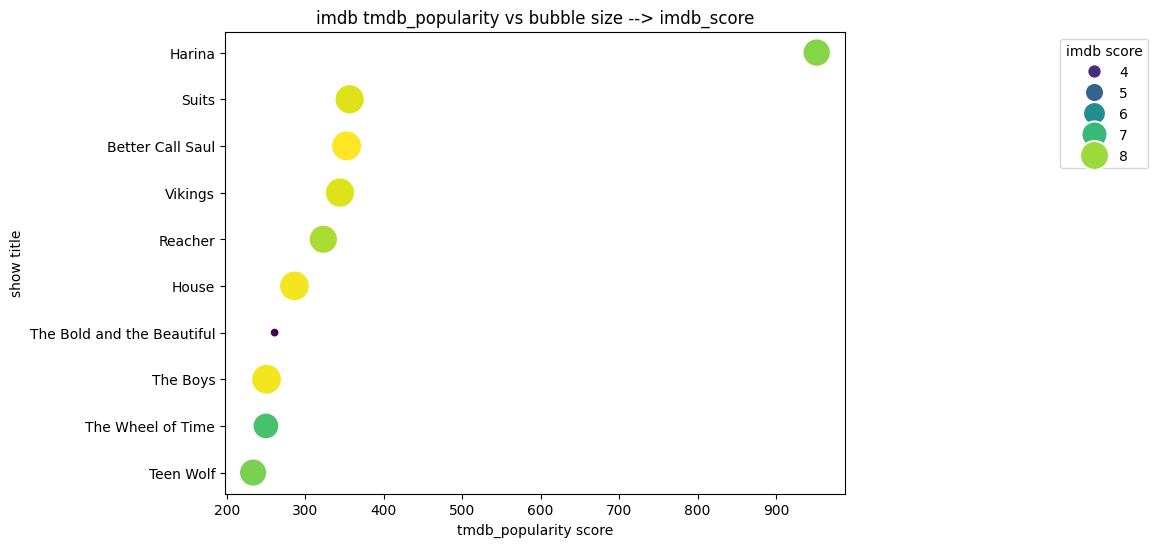

In [474]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_tmdb_shows,x='tmdb_popularity',y='title',size='imdb_score', hue='imdb_score',palette='viridis',sizes=(50, 500))
plt.title('imdb tmdb_popularity vs bubble size --> imdb_score')
plt.xlabel('tmdb_popularity score')
plt.ylabel('show title')
plt.legend(loc='upper right',  bbox_to_anchor=(1.5, 1),title='imdb score')
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a bubble chart because it shows two things together – how good a show is (imdb score) and how popular it is (bubble size). bigger bubbles mean more people watched and rated the show. it’s simple to compare ratings and popularity at the same time.

2.**What is/are the insight(s) found from the chart**?

**ans**
some shows have high imdb scores and big bubbles, meaning they are both top-rated and popular. other shows with good scores but small bubbles mean they are good but not many people know about them yet.


3.**Will the gained insights help creating a positive business impact?**

**ans** yes, these insights help prime understand which shows are doing well. they can promote hidden gems with good ratings to attract more viewers and keep promoting already popular shows.


4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** yes, if a show is rated highly but has a small bubble, it means not many people are watching it. this could be because it isn’t promoted well or is hard to find on the platform.

####Content Length-- corelation
•	Is there a correlation between runtime and IMDb score or TMDb score?


In [475]:
correlation_matrix = group_as_per_id[['runtime', 'imdb_score', 'tmdb_score']].corr()
correlation_matrix


,runtime,imdb_score,tmdb_score
runtime,1.000000,-0.072592,-0.077117
imdb_score,-0.072592,1.000000,0.516393
tmdb_score,-0.077117,0.516393,1.000000


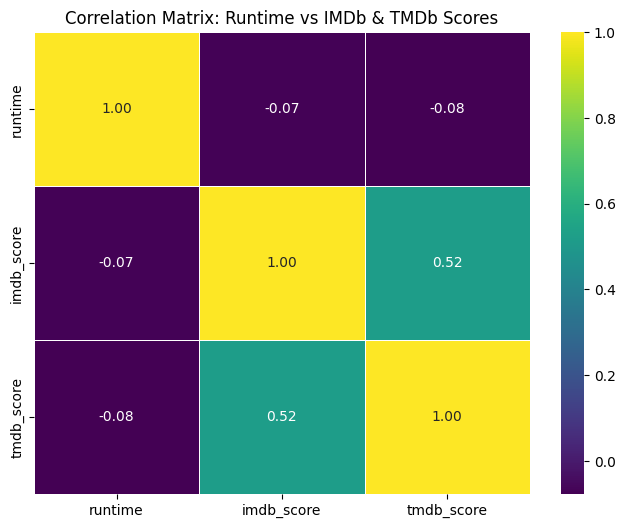

In [476]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Runtime vs IMDb & TMDb Scores')
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a correlation matrix because it helps quickly show the relationship between multiple variables, like runtime, imdb scores, and tmdb scores. it’s color-coded, so it’s easy to see if things are related.

2.**What is/are the insight(s) found from the chart**?

**ans**
imdb and tmdb scores have a positive relationship (correlation ~0.52), meaning shows with high imdb scores often have high tmdb scores too.

runtime doesn’t strongly affect either imdb or tmdb scores, as the correlations are close to zero.


3.**Will the gained insights help creating a positive business impact?**

**ans**
yes, these insights show that both imdb and tmdb scores are important indicators of a show’s success. prime can focus on promoting shows with strong ratings on both platforms.


4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans**

yes, the low correlation between runtime and ratings suggests that longer or shorter episodes don’t guarantee better ratings. if prime is focusing on creating longer episodes to improve ratings, it will  not help.

#### Seasonal Content
•	How do shows with more seasons compare to those with fewer seasons in terms of IMDb ratings?


In [477]:

#filter data where seasons are not there

group_as_per_id_season=group_as_per_id[group_as_per_id['seasons']!='N/A']

#deciding a threshold
threshold_season=3

fewer_seasons=group_as_per_id_season[group_as_per_id_season['seasons']<=threshold_season]
more_seasons=group_as_per_id_season[group_as_per_id_season['seasons']>threshold_season]

#avg imbdb rating for both
avg_imdb_fewer = fewer_seasons['imdb_score'].mean()
avg_imdb_more = more_seasons['imdb_score'].mean()

#making a new coloumn
fewer_seasons['seasons_group'] = 'Fewer Seasons'
more_seasons['seasons_group'] = 'More Seasons'

#concatenating the data as per the category
combined_df = pd.concat([fewer_seasons, more_seasons])
combined_df

<ipython-input-477-7f6f55492b83>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fewer_seasons['seasons_group'] = 'Fewer Seasons'
<ipython-input-477-7f6f55492b83>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_seasons['seasons_group'] = 'More Seasons'


,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,seasons_group
7852,ts10058,Cosmic Quantum Ray,SHOW,2010,TV-G,22,"action, family, animation, documentation",4,"FR, US, DE",1.0,tt1398547,5.6,44.0,3.408,10.0,439.0,Sam Vincent,Robbie Shipton / Justin (voice),ACTOR,Fewer Seasons
7853,ts101897,Ming Dynasty,SHOW,2019,Missing,45,"drama, fantasy, history",3,CN,1.0,tt9638680,7.8,92.0,24.602,8.7,7869.0,Tang Wei,Sun Ruowei,ACTOR,Fewer Seasons
7854,ts102139,Sergio Ramos,SHOW,2019,Missing,33,"sport, documentation, reality",3,US,2.0,tt9702106,5.3,449.0,5.939,4.4,228361.0,Sergio Ramos,Self,ACTOR,Fewer Seasons
7855,ts102921,Corazón Contento,SHOW,2018,Missing,27,"comedy, drama",2,MX,1.0,tt9495714,9.0,43.0,1.400,10.0,1369337.0,Lilía Herrera,Rosita Muñoz,ACTOR,Fewer Seasons
7857,ts10383,Big Sky,SHOW,1997,Missing,44,"drama, comedy, music",3,AU,2.0,tt5578664,6.7,119.0,8.092,8.0,14225.0,Gary Sweet,Unknown,ACTOR,Fewer Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,ts86486,LOL: Last One Laughing,SHOW,2018,Missing,31,"comedy, reality",2,MX,4.0,tt8783862,3.5,546.0,172.955,7.3,17330.0,Eugenio Derbez,Self - Host,ACTOR,More Seasons
8820,ts8805,Dinosaur Train,SHOW,2009,TV-Y,19,"animation, family",2,US,7.0,tt1460205,6.5,1178.0,23.343,6.9,2202427.0,김정교,Unknown,DIRECTOR,More Seasons
8845,ts9142,The Bold and the Beautiful,SHOW,1987,TV-14,21,"drama, romance",2,US,34.0,tt0092325,3.3,7627.0,260.884,5.8,243762.0,Katherine Kelly Lang,Brooke Logan,ACTOR,More Seasons
8856,ts968,Bobby's World,SHOW,1990,TV-Y,22,"animation, comedy, family",3,US,7.0,tt0103373,7.2,4503.0,7.875,7.0,99567.0,Gary Owens,Unknown,ACTOR,More Seasons


<ipython-input-501-24c67ff41d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seasons_group', y='imdb_score', data=combined_df, palette="rocket_r")


Text(0, 0.5, 'IMDb Score')

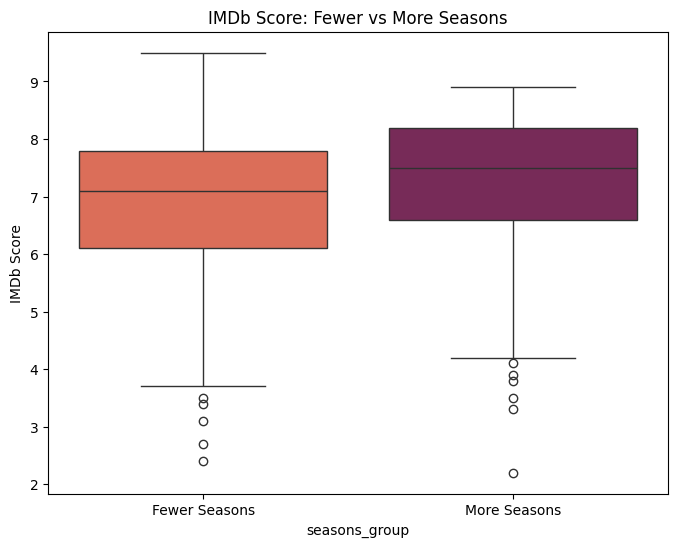

In [501]:

# Plotting with seaborn for IMDb score comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='seasons_group', y='imdb_score', data=combined_df, palette="rocket_r")
plt.title('IMDb Score: Fewer vs More Seasons')
plt.ylabel('IMDb Score')



#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** I chose a box plot because it's simple and shows how IMDb ratings are spread out for shows with fewer and more seasons. it's easy to compare the middle rating median, how the ratings vary, and if there are any extreme ratings outliers

2.**What is/are the insight(s) found from the chart**?

**ans**
Shows with more seasons generally have higher ratings .
Ratings for shows with fewer seasons are more spread out, meaning they can be really good or really bad.
Some short shows have very low ratings, as seen in the outliers.

3.**Will the gained insights help creating a positive business impact?**

**ans** Yes, this can help Prime decide to continue popular, highly-rated shows with more seasons to keep viewers engaged. They can also focus on improving or promoting short, good-rated shows to attract more viewers.

4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** Yes, some short shows have very low ratings, which could make viewers avoid trying other short shows. This might happen if those shows aren't made well or aren't promoted properly.

#### Impact of Actors
•	Which actors are associated with the highest-rated content based on IMDb and TMDb scores?



In [479]:
#heighst rated content where imdb score and tmdb >8.0
actor_wise = movie_df[(movie_df['imdb_score'] > 8.0) | (movie_df['tmdb_score'] > 8.0)]


#only the data where role
actor_wise=actor_wise[actor_wise['role']=='ACTOR']
actor_wise.head(2)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR


In [480]:
#group by as per actor ---and sorting value as per their movie count
actor_wise_summary=actor_wise.groupby(['person_id', 'name']).agg({
    'title':'count',
    'imdb_score':'mean',
    'tmdb_score':'mean'
}).rename(columns={"title":'movie_count'}).reset_index()
actor_wise_summary


,person_id,name,movie_count,imdb_score,tmdb_score
0,7.0,Tamsin Greig,2,7.1,8.25
1,10.0,Darren Boyd,1,7.6,8.40
2,24.0,Alejandro Camacho,1,8.6,7.30
3,26.0,Rosa María Bianchi,1,8.6,7.30
4,61.0,Ryan Hansen,1,8.3,7.60
...,...,...,...,...,...
5567,2355552.0,Rajesh Balraj,1,8.1,7.40
5568,2359511.0,Edward Rodríguez,1,3.4,10.00
5569,2368488.0,Sandip Chakraborty,1,8.3,8.00
5570,2368856.0,Barbara Chichianelli,1,6.0,8.30


In [481]:
#combined average score
actor_wise_summary['avg_score'] = actor_wise_summary[['imdb_score', 'tmdb_score']].mean(axis=1)
 #sorted data as per their avg score---quality based top actors (with movie_count >= 3)
top_by_avg_score = actor_wise_summary[actor_wise_summary['movie_count'] >= 3].sort_values(by='avg_score', ascending=False).head(30)
top_by_avg_score

,person_id,name,movie_count,imdb_score,tmdb_score,avg_score
3755,596342.0,Peter Ginn,4,8.675000,9.275000,8.975000
2293,110339.0,Ruth Goodman,4,8.675000,9.275000,8.975000
4267,926142.0,Liu Xueyi,3,8.500000,9.000000,8.750000
216,4772.0,John E. Kennedy,3,6.633333,10.000000,8.316667
2967,203610.0,'Poo' Ram,4,8.800000,7.800000,8.300000
34,348.0,Akio Otsuka,4,8.050000,8.550000,8.300000
1627,67198.0,Lucille Ball,3,7.966667,8.633333,8.300000
1054,32615.0,Kathryn Mullen,3,6.600000,10.000000,8.300000
2104,98444.0,Desi Arnaz,3,7.966667,8.633333,8.300000
2289,109112.0,Anthony Asbury,3,6.600000,10.000000,8.300000


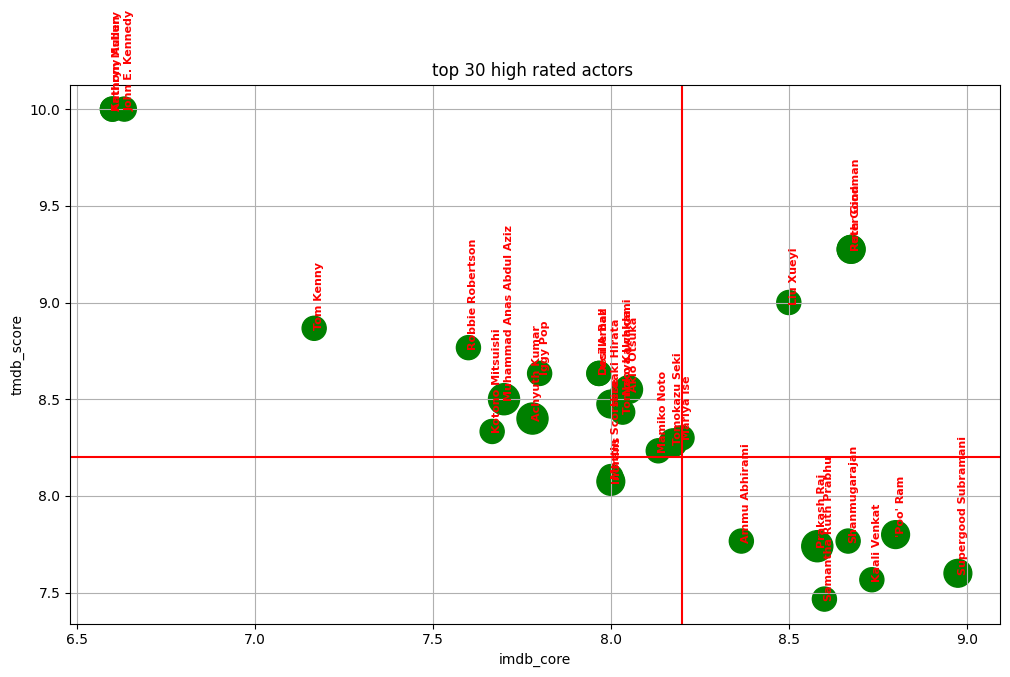

In [506]:
plt.figure(figsize=(12, 7))
plt.scatter(top_by_avg_score['imdb_score'], top_by_avg_score['tmdb_score'],color='green', s=top_by_avg_score['movie_count'] * 100)
plt.axhline(8.2, color='red')
plt.axvline(8.2, color='red')

for i in range(top_by_avg_score.shape[0]):#in data total num of rows
    plt.text(top_by_avg_score['imdb_score'].values[i], top_by_avg_score['tmdb_score'].values[i], top_by_avg_score['name'].values[i],
             fontsize=8, color='red',rotation='vertical',weight='bold')

plt.xlabel('imdb_core')
plt.ylabel('tmdb_score')
plt.title('top 30 high rated actors ')
plt.grid(True)
plt.show()

#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i used a scatter plot because it clearly shows how each actor's imdb and tmdb scores compare. it's a simple way to spot the top-rated actors and understand their average ratings.

2.**What is/are the insight(s) found from the chart**?

**ans**
actors with high scores on both imdb and tmdb are rare. only a few actors stand out in the top-right area, meaning they’re loved by both platforms. also, most actors have mixed ratings.

3.**Will the gained insights help creating a positive business impact?**

**ans** yes, this can help ott platforms pick actors with strong fan support across platforms. casting such actors can boost content popularity and viewer trust.

4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans** yes, some actors have high ratings on one platform but low on the other. this mismatch can confuse viewers.

#### Content Investment Trends:

What genres get best ratings → where to invest?

In [483]:
group_as_per_id.head(1)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,"western, action, romance",3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR


In [484]:
#-- genre should not be empty strings
group_as_per_id_genre=group_as_per_id[group_as_per_id['genres']!=""]

In [485]:
#first same as we so many values in genre
group_as_per_id_genre['genres'] = group_as_per_id_genre['genres'].str.split(',')
exploded_data = group_as_per_id_genre.explode('genres')#exploding so that every genre will count only once
exploded_data['genres'] = exploded_data['genres'].str.strip()
exploded_data.head(2)

<ipython-input-485-894679edbe6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_as_per_id_genre['genres'] = group_as_per_id_genre['genres'].str.split(',')


,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,western,3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,action,3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR


In [486]:
#grouping data as per genre and then calculating mean imdb
best_rated_by_genre = exploded_data.groupby('genres').agg(
    imdb_score=('imdb_score', 'mean'),
    count=('imdb_score', 'count')
).rename(columns={'count': 'movie_count'}).reset_index()

best_rated_by_genre_sorted = best_rated_by_genre.sort_values(by='imdb_score', ascending=False).head(10)

best_rated_by_genre_sorted


,genres,imdb_score,movie_count
4,documentation,6.857047,894
9,history,6.723967,363
12,reality,6.615306,98
1,animation,6.418280,372
17,war,6.363141,312
15,sport,6.348058,206
6,european,6.292041,691
11,music,6.158578,408
5,drama,6.110841,4437
7,family,6.083742,652


<ipython-input-487-285c59601637>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_rated_by_genre_sorted['genres'], y=best_rated_by_genre_sorted['imdb_score'], palette='viridis')


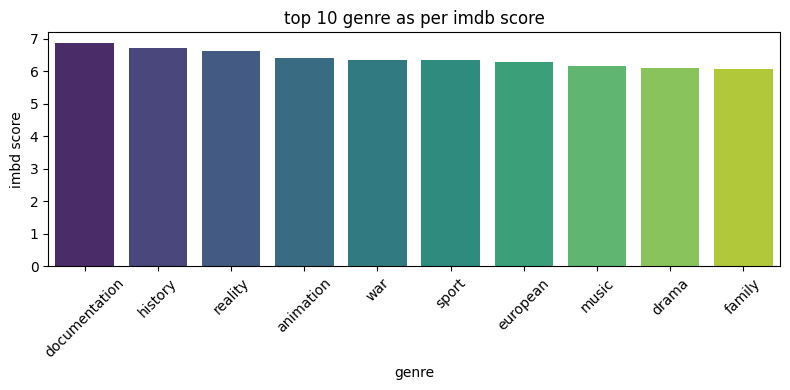

In [487]:
plt.figure(figsize=(8, 4))
sns.barplot(x=best_rated_by_genre_sorted['genres'], y=best_rated_by_genre_sorted['imdb_score'], palette='viridis')
plt.title('top 10 genre as per imdb score')
plt.xlabel('genre')
plt.xticks(rotation=45)
plt.ylabel('imbd score')
plt.tight_layout()
plt.show()


#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.**  i chose a bar plot because it's simple and helps compare imdb ratings across genres. it shows the variation in ratings and gives a clear view of which genres perform the best.

2.**What is/are the insight(s) found from the chart**?

**ans**
genres like drama and action tend to have higher ratings, while others like comedy and horror show more variation in scores. some genres also have more movies, which can affect the overall average rating.


3.**Will the gained insights help creating a positive business impact?**

**ans** es, these insights can help streaming platforms like prime identify popular genres to focus on and create more content in high-rated categories. they can also improve the promotion of underperforming genres.


4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans**yes, some genres with a low number of movies may have low ratings, which could affect overall user satisfaction. if these genres are promoted too much despite low ratings, it might lead to a decline in viewer interest.

 #### average IMDb score by release year and type (Movie/TV Show)(heatmap) after 2000

In [488]:
group_as_per_id

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,"western, action, romance",3,US,N/A,tt0025440,5.6,1213.0,4.079,4.70,25629.0,John Wayne,Jerry Mason,ACTOR
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,2021,Missing,99,"scifi, animation",2,CN,N/A,tt11654032,5.4,117.0,6.135,3.80,1793831.0,Chris Boike,Unknown,ACTOR
2,tm1000169,Bad Cupid,MOVIE,2021,Missing,81,"romance, comedy",2,Unknown,N/A,tt11333938,4.4,181.0,3.295,4.80,2853.0,John Rhys-Davies,Archie,ACTOR
3,tm1000203,Digging to Death,MOVIE,2021,Missing,96,"horror, thriller",2,US,N/A,tt7752100,4.5,464.0,3.543,5.80,67535.0,Ford Austin,David Vanowen,ACTOR
4,tm1000290,Secrets in the Water,MOVIE,2020,Missing,77,thriller,1,US,N/A,Unknown,6.0,0.0,5.825,7.40,13236.0,Cerina Vincent,Laura,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,ts968,Bobby's World,SHOW,1990,TV-Y,22,"animation, comedy, family",3,US,7.0,tt0103373,7.2,4503.0,7.875,7.00,99567.0,Gary Owens,Unknown,ACTOR
8857,ts97421,Chronofilm,SHOW,2020,Missing,20,scifi,1,US,1.0,tt7275066,5.7,16.0,0.840,6.02,1992417.0,Joseph Hypes,Unknown,ACTOR
8858,ts97576,Volatile Earth,SHOW,2017,Missing,47,documentation,1,GB,1.0,tt7204306,7.2,24.0,0.630,8.00,27664.0,Mark Bazeley,Narrator (Voice),ACTOR
8859,ts9770,The Adventures of Tintin,SHOW,1991,TV-Y7,23,"action, animation, family, comedy, crime, euro...",6,"US, BE, CA, FR",7.0,tt0179552,8.2,17859.0,25.766,8.00,110490.0,Thierry Wermuth,Tintin (voice),ACTOR


In [489]:

#creating pivot table
pivot_df = group_as_per_id.pivot_table(
    index='release_year',
    columns='type',
    values='imdb_score',
    aggfunc='mean'
).sort_index()
#as data is too much so filtering for >=2000
pivot_df_filtered = pivot_df[pivot_df.index >= 2000]

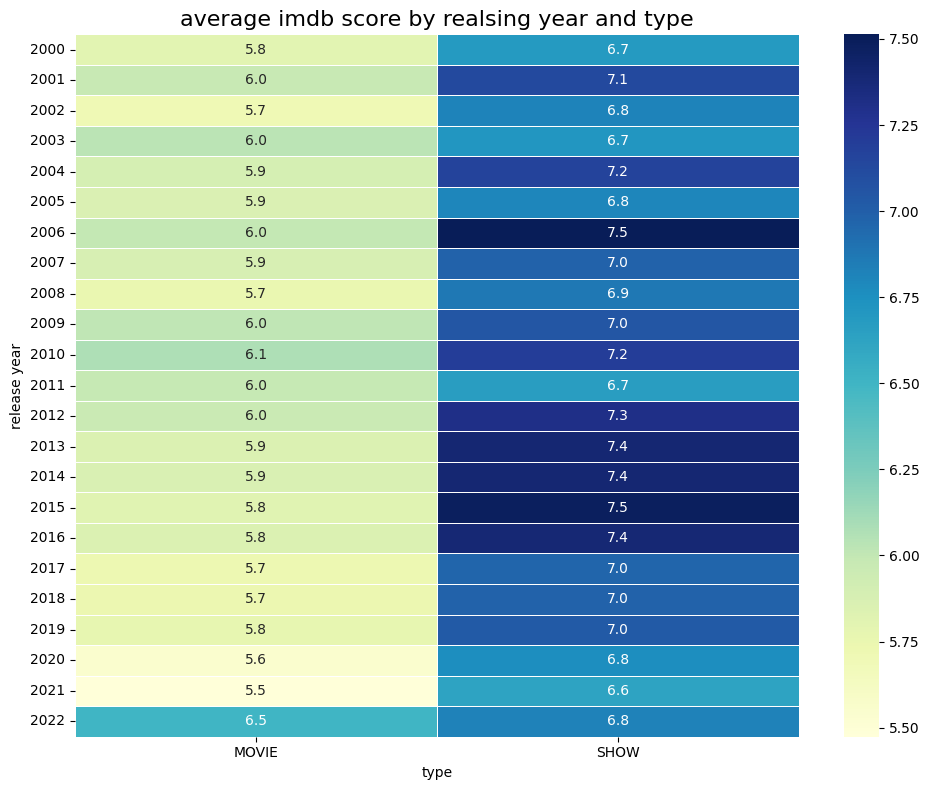

In [490]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_filtered, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title("average imdb score by realsing year and type", fontsize=16)
plt.xlabel("type")
plt.ylabel("release year")
plt.tight_layout()
plt.show()


#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.**  i chose a heatmap because it's simple and helps compare imdb ratings across types if it s movie or show. it clearly shows which type perform better .

2.**What is/are the insight(s) found from the chart**?

**ans**
type like show and action tend to have higher ratings, while movies have less rating compartively. for 2022 is is almost doing same.


3.**Will the gained insights help creating a positive business impact?**

**ans**yes, these insights can help streaming platforms like prime decide which genres to focus on movies or shows. thats we see genrally in orime shows are popular .


4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans**yes, some type of movies  may have low ratings, which could affect overall user satisfaction. if these genres are promoted too much despite low ratings, it might lead to a decline in viewer interest.

#### how does the imdb score change with release year across different age certifications?

certification	full form	meaning
G	General Audience
PG	Parental Guidance
PG-13
R
NC-17	-no childeren under 17

In [491]:
group_as_per_id_agec=group_as_per_id[group_as_per_id['age_certification']!='Missing']
group_as_per_id_agec.head(1)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
6,tm1000406,Dark Corners,MOVIE,2021,R,90,thriller,1,"GB, NO",N/A,tt8391548,4.0,81.0,2.999,8.0,1745.0,Sam Hazeldine,Strachan,ACTOR


In [492]:
group_as_per_id_agec = group_as_per_id[group_as_per_id['age_certification'] != 'Missing']
group_as_per_id_agec.columns = group_as_per_id_agec.columns.str.strip()


In [493]:
group_as_per_id_agec['age_certification'].value_counts()

,count
age_certification,
R,1239
PG-13,574
PG,558
G,263
TV-MA,206
TV-14,166
TV-PG,73
TV-Y,56
TV-G,44


In [494]:
#top five age certification
top_5 = ['R', 'PG-13', 'PG', 'G', 'TV-MA']
filtered_df = group_as_per_id_agec[group_as_per_id_agec['age_certification'].isin(top_5)]

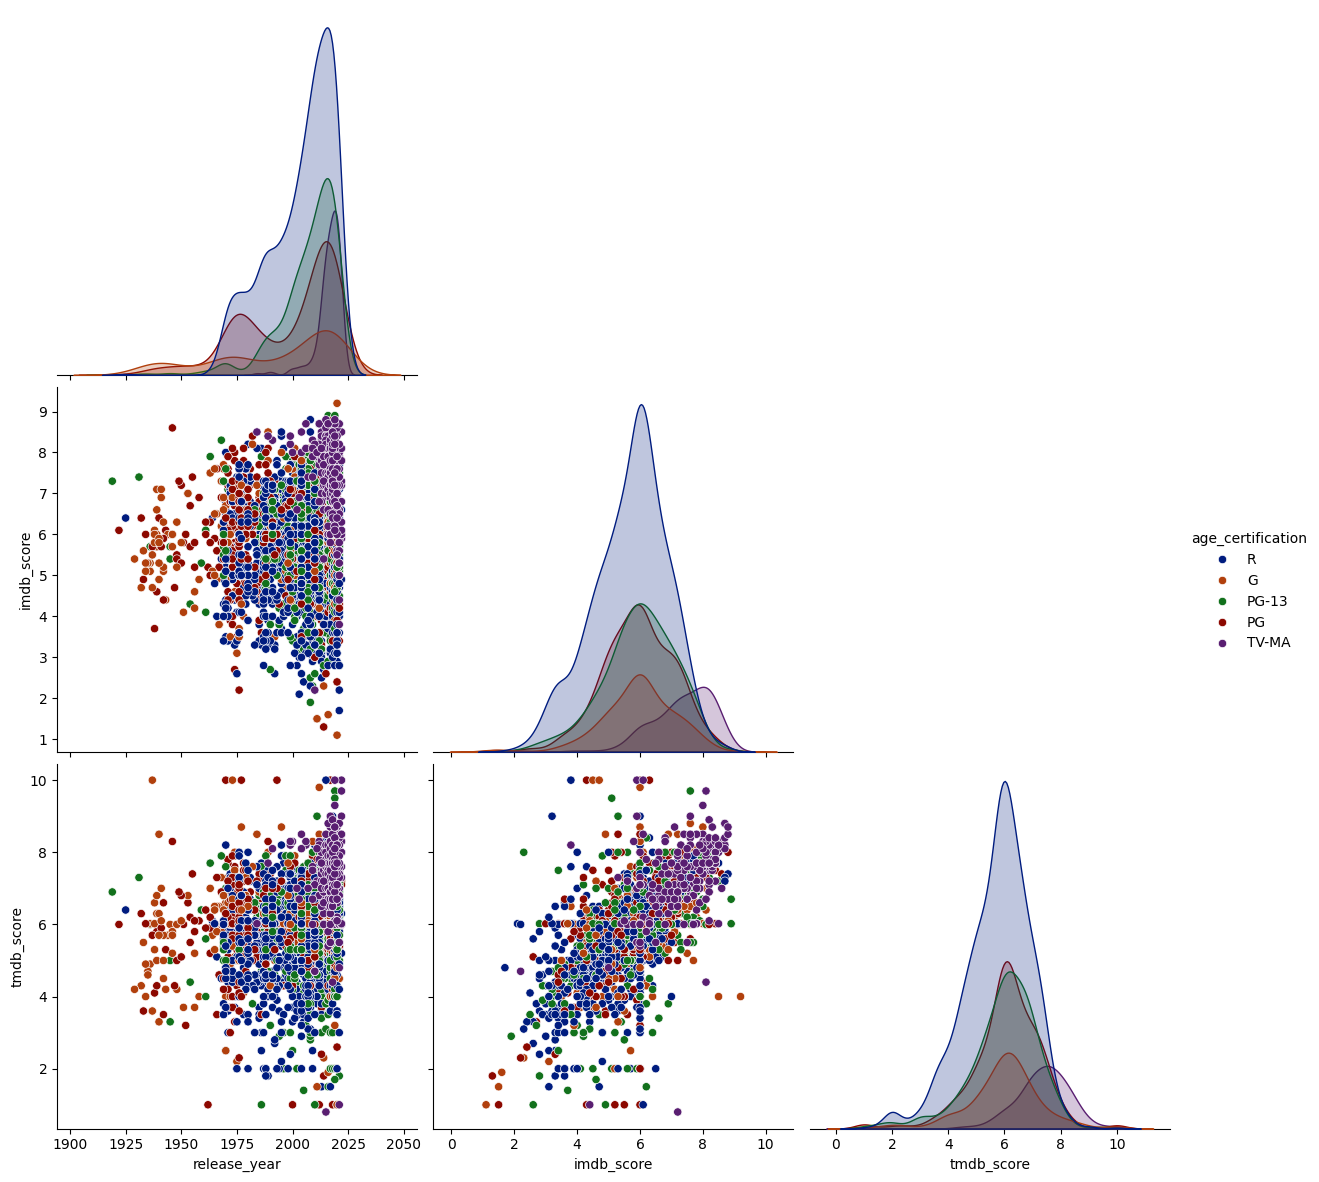

In [495]:


sns.pairplot(filtered_df[['release_year', 'imdb_score', 'age_certification','tmdb_score']],hue='age_certification', palette='dark',height=4,corner=True)



#####Related_to_charts questions .
**1. Why did you pick the specific chart?**

**ans.** i chose a pairplot because it helps show the relationship between release year and imdb score while highlighting the effect of different age certifications. it's useful for seeing trends across age groups in one chart.

2.**What is/are the insight(s) found from the chart**?

**ans**
titles with certifications like PG and r have a wider range of imdb scores, while G-Rated and TV-MA content mostly stays in a limited range. also, high-rated content is spread more after 2000, especially in PG and R .


3.**Will the gained insights help creating a positive business impact?**

**ans** yes, understanding which age certifications are linked to better ratings can help platforms decide the type of content to produce or recommend more. they can target user groups better based on content preferences.


4.**Are there any insights that lead to negative growth? Justify with specific reason.**

**ans**yes, some age categories like TV-Y or NC-17 may have lower or poor ratings, and focusing too much on these could lead to poor audience engagement.



## **5. Solution to Business Objective**

####what do you suggest the client to achieve Business Objective ?
1. drama and comedy are the most watched types of shows, so amazon should FOCUS more shows in these genres.

2. most of the content on amazon prime is movies, so adding more tv shows will make things better for people who like series as imdb scores are also good.

3. most shows are from the USA so amazon should add more shows from other countries to get more viewers from around the world.

4. new shows increased from 2013 to 2019, but became less after 2020, so amazon should start adding more new shows again.

5. most shows have imdb scores between 6 and 7, so amazon should try to make better shows to get higher ratings.

6. many shows do not have age limits, so amazon should make sure every show has an age label so people know if it’s okay for kids.

7. tv shows with more seasons usually get better scores, so amazon should make longer series that people can enjoy for a long time.

8. shows with too many genres are not always better, so amazon should make shows with just 1 to 3 clear genres.



# **Conclusion**
After completing the analysis of amazon prime video content, we learned many important things that show both the strengths and weaknesses of the platform.
-  **Should add more shows** as they are widely focusing on movies also **we found that tv shows with more seasons often have higher ratings**.so viwers who watch shows also will be the part of AmazonPrime.

-  Important finding was about imdb scores. most shows had scores between 6 and 7, **which means the content is okay but not great**. only a few shows had high ratings. this shows that **amazon should improve the quality of the shows by focusing on better stories, acting, and production**.

-  Many shows do not have age ratings amazon should make sure that all **shows have clear age certifications** so that people know what is safe to watch.

-   amazon **should add more shows from other countries** to get more viewers from around the world.

- **avoiding too many mixed genres** in one show helps users know what to expect and improves satisfaction


**in short, if amazon prime focuses on better variety, clear content info, and high-quality shows, it can grow faster and keep viewers happy.**